In [1]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import gc
import warnings
warnings.filterwarnings("ignore")

In [2]:
##will read csv file
data_invoice = pd.read_csv(r'C:\Users\Abhishek Kabra\H2HBABBA1102.csv')

In [3]:
data_invoice

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR associates,2019-04-24 00:00:00,2019.0,1.929141e+09,2019-04-14,20190413,20190414,20190429.0,USD,RV,1.0,NaN,18217.40,20190414.0,NAH4,1.929141e+09,0
1,CA02,0140106408,WAL-M in,2019-04-23 00:00:00,2019.0,2.960539e+09,2019-04-04,20190404,20190404,20190414.0,CAD,RV,1.0,NaN,94256.85,20190404.0,CA10,2.960539e+09,0
2,U001,0200762301,C&S WH foundation,2019-02-01 00:00:00,2019.0,1.928636e+09,2019-01-18,20190117,20190118,20190202.0,USD,RV,1.0,NaN,52782.71,20190118.0,NAC6,1.928636e+09,0
3,U001,0200777735,NASH corp,2019-03-20 00:00:00,2019.0,1.928915e+09,2019-03-06,20190306,20190306,20190321.0,USD,RV,1.0,NaN,5228.96,20190306.0,NAA8,1.928915e+09,0
4,CA02,0100034821,17135,2019-08-19 00:00:00,2019.0,2.960565e+09,2019-07-30,20190730,20190730,20190810.0,CAD,RV,1.0,NaN,4668.00,20190731.0,CA10,2.960565e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,200769623,WAL-MAR,2019-04-09 00:00:00,2019.0,1.928996e+09,2019-03-22,20190320,20190322,20190406.0,USD,RV,1.0,NaN,29695.05,20190322.0,NAH4,1.928996e+09,0
49996,U001,0200390794,CASH-W llc,NaN,2020.0,1.930618e+09,2020-03-09,20200307,20200309,20200324.0,USD,RV,1.0,NaN,32418.34,20200309.0,NAA8,1.930618e+09,1
49997,U001,0200742791,QUI in,2019-07-31 00:00:00,2019.0,1.929609e+09,2019-07-11,20190711,20190711,20190726.0,USD,RV,1.0,NaN,1597.32,20190711.0,NAA8,1.929609e+09,0
49998,CA02,0140104440,SO co,2019-05-21 00:00:00,2019.0,2.960547e+09,2019-05-04,20190504,20190504,20190514.0,CAD,RV,1.0,NaN,81938.47,20190504.0,CA10,2.960547e+09,0


In [4]:
data_invoice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

### finding delay

In [5]:
##we have to change clear date to date and time format so that we can find delay and also the due date
data_invoice['clear_date'] = pd.to_datetime(data_invoice['clear_date'])
data_invoice["due_in_date"]= pd.to_datetime(data_invoice.due_in_date,format='%Y%m%d')

In [6]:
##we can find our delay now.so,delay will be liek days from due date to clear date
data_invoice['delay'] = (data_invoice['clear_date']-data_invoice['due_in_date']).dt.days

In [7]:
data_invoice


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
0,U001,0200769623,WAL-MAR associates,2019-04-24,2019.0,1.929141e+09,2019-04-14,20190413,20190414,2019-04-29,USD,RV,1.0,NaN,18217.40,20190414.0,NAH4,1.929141e+09,0,-5.0
1,CA02,0140106408,WAL-M in,2019-04-23,2019.0,2.960539e+09,2019-04-04,20190404,20190404,2019-04-14,CAD,RV,1.0,NaN,94256.85,20190404.0,CA10,2.960539e+09,0,9.0
2,U001,0200762301,C&S WH foundation,2019-02-01,2019.0,1.928636e+09,2019-01-18,20190117,20190118,2019-02-02,USD,RV,1.0,NaN,52782.71,20190118.0,NAC6,1.928636e+09,0,-1.0
3,U001,0200777735,NASH corp,2019-03-20,2019.0,1.928915e+09,2019-03-06,20190306,20190306,2019-03-21,USD,RV,1.0,NaN,5228.96,20190306.0,NAA8,1.928915e+09,0,-1.0
4,CA02,0100034821,17135,2019-08-19,2019.0,2.960565e+09,2019-07-30,20190730,20190730,2019-08-10,CAD,RV,1.0,NaN,4668.00,20190731.0,CA10,2.960565e+09,0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,200769623,WAL-MAR,2019-04-09,2019.0,1.928996e+09,2019-03-22,20190320,20190322,2019-04-06,USD,RV,1.0,NaN,29695.05,20190322.0,NAH4,1.928996e+09,0,3.0
49996,U001,0200390794,CASH-W llc,NaT,2020.0,1.930618e+09,2020-03-09,20200307,20200309,2020-03-24,USD,RV,1.0,NaN,32418.34,20200309.0,NAA8,1.930618e+09,1,NaN
49997,U001,0200742791,QUI in,2019-07-31,2019.0,1.929609e+09,2019-07-11,20190711,20190711,2019-07-26,USD,RV,1.0,NaN,1597.32,20190711.0,NAA8,1.929609e+09,0,5.0
49998,CA02,0140104440,SO co,2019-05-21,2019.0,2.960547e+09,2019-05-04,20190504,20190504,2019-05-14,CAD,RV,1.0,NaN,81938.47,20190504.0,CA10,2.960547e+09,0,7.0


In [8]:
##Let's check if we have any min null 
data_invoice.isna().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    4
isOpen                        0
delay                     10000
dtype: int64

In [9]:
##we can drop this 4 invoice id

In [10]:
##having  some null in invoice_id 
data_invoice[data_invoice.invoice_id.isna()]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
3726,CA02,0100030194,AMAZO,2019-12-27,2019.0,9.500000e+09,2019-03-29,20190329,20190305,2019-03-15,CAD,X2,1.0,NaN,313.15,20190305.0,CA10,NaN,0,287.0
20343,CA02,0140104409,LOB co,2019-05-31,2019.0,9.500000e+09,2019-03-29,20190329,20181024,2018-11-03,CAD,X2,1.0,NaN,878.40,20181024.0,CA10,NaN,0,209.0
33049,CA02,0100054349,PURITY L in,2019-05-31,2019.0,9.500000e+09,2019-03-29,20190329,20190315,2019-03-25,CAD,X2,1.0,NaN,1123.20,20190315.0,CA10,NaN,0,67.0
35201,CA02,0140104409,LOB us,2019-12-27,2019.0,9.500000e+09,2019-03-29,20190329,20181126,2018-12-06,CAD,X2,1.0,NaN,420.40,20181126.0,CA10,NaN,0,386.0


In [11]:
##it can be a technical problem or anything and we are getting it null now we can drop these da
data_invoice= data_invoice[data_invoice.invoice_id.isnull()==False]##removed those 4 blocks 

## removing null from data and making train and test

In [12]:
## we will train our data on a set and predict on another so we can make two sets
## one is train set and another is test set
## as our target column is delay
main_train = data_invoice[data_invoice.delay.isnull()==False]## all values without null where we will do all computation
main_test  = data_invoice[data_invoice.delay.isnull()] ## all with null where we have to predict 

# Preprocessing

### null imputation

In [13]:
main_train[main_train.invoice_id.isnull()]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay


In [14]:
main_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39996 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           39996 non-null  object        
 1   cust_number             39996 non-null  object        
 2   name_customer           39996 non-null  object        
 3   clear_date              39996 non-null  datetime64[ns]
 4   buisness_year           39996 non-null  float64       
 5   doc_id                  39996 non-null  float64       
 6   posting_date            39996 non-null  object        
 7   document_create_date    39996 non-null  int64         
 8   document_create_date.1  39996 non-null  int64         
 9   due_in_date             39996 non-null  datetime64[ns]
 10  invoice_currency        39996 non-null  object        
 11  document type           39996 non-null  object        
 12  posting_id              39996 non-null  float6

In [15]:
##i can see some doc_id and invoice id are identical let's compare them

In [16]:
main_train["doc_id"]=main_train.doc_id.astype(int)

In [17]:
compare= np.where(main_train["doc_id"] == main_train["invoice_id"], True, False)

In [18]:
compare

array([ True, False,  True, ...,  True, False, False])

In [19]:
##not same so we leave it like this

In [20]:
## our business_year is in float so no use of that decimal part so we can change it to int
main_train["buisness_year"]=main_train.buisness_year.astype(int)

In [21]:
## our area_business is 0 non-null values means all are null so no use of that column to us
main_train = main_train.drop(['area_business'],axis=1)

## date time conversion

In [22]:
main_train['document_create_date.1'] = pd.to_datetime(main_train['document_create_date.1'],format = '%Y%m%d')

In [23]:
main_train['document_create_date'] = pd.to_datetime(main_train['document_create_date'],format = '%Y%m%d')

In [24]:
main_train['posting_date'] = pd.to_datetime(main_train['posting_date'])

In [25]:
main_train['baseline_create_date'] = pd.to_datetime(main_train['baseline_create_date'],format = '%Y%m%d')

In [26]:
main_train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
0,U001,0200769623,WAL-MAR associates,2019-04-24,2019,1929140585,2019-04-14,2019-04-13,2019-04-14,2019-04-29,USD,RV,1.0,18217.40,2019-04-14,NAH4,1.929141e+09,0,-5.0
1,CA02,0140106408,WAL-M in,2019-04-23,2019,-2147483648,2019-04-04,2019-04-04,2019-04-04,2019-04-14,CAD,RV,1.0,94256.85,2019-04-04,CA10,2.960539e+09,0,9.0
2,U001,0200762301,C&S WH foundation,2019-02-01,2019,1928635767,2019-01-18,2019-01-17,2019-01-18,2019-02-02,USD,RV,1.0,52782.71,2019-01-18,NAC6,1.928636e+09,0,-1.0
3,U001,0200777735,NASH corp,2019-03-20,2019,1928915466,2019-03-06,2019-03-06,2019-03-06,2019-03-21,USD,RV,1.0,5228.96,2019-03-06,NAA8,1.928915e+09,0,-1.0
4,CA02,0100034821,17135,2019-08-19,2019,-2147483648,2019-07-30,2019-07-30,2019-07-30,2019-08-10,CAD,RV,1.0,4668.00,2019-07-31,CA10,2.960565e+09,0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,0200769623,WAL-MAR us,2019-06-21,2019,1929464105,2019-06-11,2019-06-10,2019-06-11,2019-06-26,USD,RV,1.0,11400.15,2019-06-11,NAH4,1.929464e+09,0,-5.0
49995,U001,200769623,WAL-MAR,2019-04-09,2019,1928996399,2019-03-22,2019-03-20,2019-03-22,2019-04-06,USD,RV,1.0,29695.05,2019-03-22,NAH4,1.928996e+09,0,3.0
49997,U001,0200742791,QUI in,2019-07-31,2019,1929608855,2019-07-11,2019-07-11,2019-07-11,2019-07-26,USD,RV,1.0,1597.32,2019-07-11,NAA8,1.929609e+09,0,5.0
49998,CA02,0140104440,SO co,2019-05-21,2019,-2147483648,2019-05-04,2019-05-04,2019-05-04,2019-05-14,CAD,RV,1.0,81938.47,2019-05-04,CA10,2.960547e+09,0,7.0


In [27]:
main_train.info()  ##we got our accurate date time column in their exact dtype

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39996 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           39996 non-null  object        
 1   cust_number             39996 non-null  object        
 2   name_customer           39996 non-null  object        
 3   clear_date              39996 non-null  datetime64[ns]
 4   buisness_year           39996 non-null  int32         
 5   doc_id                  39996 non-null  int32         
 6   posting_date            39996 non-null  datetime64[ns]
 7   document_create_date    39996 non-null  datetime64[ns]
 8   document_create_date.1  39996 non-null  datetime64[ns]
 9   due_in_date             39996 non-null  datetime64[ns]
 10  invoice_currency        39996 non-null  object        
 11  document type           39996 non-null  object        
 12  posting_id              39996 non-null  float6

In [28]:
##we have posting date and document create date having same dates
compare= np.where(main_train["posting_date"] == main_train["document_create_date.1"], True, False)

In [29]:
compare

array([ True,  True,  True, ...,  True,  True,  True])

In [30]:
## we can drop posting date
main_train.drop("document_create_date.1",axis=1,inplace=True)

### checking for unique

In [31]:
main_train.nunique()

business_code               6
cust_number              1308
name_customer            3888
clear_date                397
buisness_year               2
doc_id                  36023
posting_date              421
document_create_date      427
due_in_date               496
invoice_currency            2
document type               1
posting_id                  1
total_open_amount       35618
baseline_create_date      432
cust_payment_terms         70
invoice_id              39118
isOpen                      1
delay                     177
dtype: int64

In [32]:
# we are having 6 business_code unique values let's see them also
main_train.business_code.value_counts()

U001    36167
CA02     3152
U013      530
U002      130
U005       14
U007        3
Name: business_code, dtype: int64

In [33]:
##not do anything with it


In [34]:
##we can drop the constant columns now
unique_columns =  [i for i in main_train.columns if main_train[i].nunique()==1] 
print(unique_columns)
main_train.drop(unique_columns,axis=1,inplace=True)
main_train.columns

['document type', 'posting_id', 'isOpen']


Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'due_in_date', 'invoice_currency', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'delay'],
      dtype='object')

In [35]:
##in info part also we saw that our two columns having constant vlaue throught dataset
##here we removed those columns

### removing duplicates

In [36]:
main_train.duplicated().sum()

878

In [37]:
main_train = main_train.drop_duplicates(keep='first')

In [38]:
main_train.duplicated().sum()

0

In [39]:
###we are done with duplicates now


In [40]:
main_train.shape

(39118, 15)

## Sorting according to posting date

In [41]:
main_train.sort_values(by=['posting_date'],inplace = True)

In [42]:
main_train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay
35753,CA02,0140106408,WAL-M,2019-01-25,2019,-2147483648,2018-12-30,2018-12-30,2019-01-09,CAD,27645.25,2018-12-30,CA10,2.960520e+09,16.0
12437,U001,0200769623,WAL-MAR corp,2019-01-09,2019,1928540945,2018-12-30,2018-12-29,2019-01-14,USD,1764.66,2018-12-30,NAH4,1.928541e+09,-5.0
29057,U001,0200769623,WAL-MAR llc,2019-01-09,2019,1928542580,2018-12-30,2018-12-30,2019-01-14,USD,48349.30,2018-12-30,NAH4,1.928543e+09,-5.0
5530,U001,0200726979,BJ'S llc,2019-01-15,2019,1928539774,2018-12-30,2018-12-29,2019-01-14,USD,137.84,2018-12-30,NAA8,1.928540e+09,1.0
21494,U001,CCU013,KRAFT F systems,2019-03-01,2019,1928516978,2018-12-30,2018-12-31,2018-12-30,USD,9685.62,2018-12-30,NAX2,1.928517e+09,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1289,CA02,0140106249,FINDLAY trust,2020-03-11,2020,-2147483648,2020-02-27,2020-02-27,2020-03-10,CAD,12104.10,2020-02-29,CA10,2.960618e+09,1.0
29972,U001,0200722444,PERFOR,2020-03-18,2020,1930546662,2020-02-27,2020-02-19,2020-03-30,USD,7465.20,2020-02-27,NA32,1.930547e+09,-12.0
5377,U001,0200794332,COST systems,2020-03-12,2020,1930576424,2020-02-27,2020-02-27,2020-03-13,USD,4063.66,2020-02-27,NAAX,1.930576e+09,-1.0
44625,U001,0100004536,BAS systems,2020-03-12,2020,1930571000,2020-02-27,2020-02-26,2020-03-13,USD,18509.90,2020-02-27,NAA8,1.930571e+09,-1.0


In [43]:
comparison = np.where(main_train["posting_date"] == main_train["baseline_create_date"], True, False)

In [44]:
comparison

array([ True,  True,  True, ...,  True,  True,  True])

In [45]:
##both are same so we can drop baseline create date 

In [46]:
main_train.drop(['baseline_create_date'],inplace =True,axis=1)

# SPLITTING

In [47]:
## we will split our main_train into train, test and val set

In [48]:
#will be making two vriables x and y
from sklearn.model_selection import train_test_split
X = main_train.drop(['delay'],axis=1)
Y = main_train['delay']

In [49]:
X_train,X_inter_test,y_train,y_inter_test = train_test_split(X,Y,test_size=0.3,random_state=0 , shuffle = False)

In [50]:
X_val,X_test,y_val,y_test = train_test_split(X_inter_test,y_inter_test,test_size=0.5,random_state=0 , shuffle = False)

In [51]:
X_train.shape , X_val.shape , X_test.shape

((27382, 13), (5868, 13), (5868, 13))

# EDA

<AxesSubplot:xlabel='delay', ylabel='Density'>

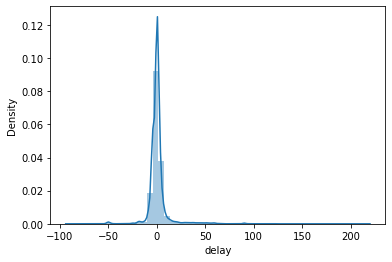

In [52]:
##now we start plotting graph so that we can get some good informtion and we can analyse it
sns.distplot(main_train.delay)

In [53]:
##it's right skewed

[Text(0.5, 0, 'delay in days'), Text(0, 0.5, 'total_open_amount')]

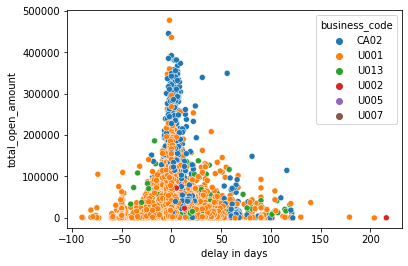

In [54]:
fifth_plot = sns.scatterplot(data = main_train,x='delay',y='total_open_amount',hue = "business_code")
fifth_plot.set(xlabel="delay in days",ylabel = "total_open_amount",)

In [55]:
## we can see the company having business code U001 clear most invoices on time
##and one with code CA02 having a large delay on some payment

In [56]:
X_train.merge(y_train,on = X_train.index)

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,invoice_id,delay
0,35753,CA02,0140106408,WAL-M,2019-01-25,2019,-2147483648,2018-12-30,2018-12-30,2019-01-09,CAD,27645.25,CA10,2.960520e+09,16.0
1,12437,U001,0200769623,WAL-MAR corp,2019-01-09,2019,1928540945,2018-12-30,2018-12-29,2019-01-14,USD,1764.66,NAH4,1.928541e+09,-5.0
2,29057,U001,0200769623,WAL-MAR llc,2019-01-09,2019,1928542580,2018-12-30,2018-12-30,2019-01-14,USD,48349.30,NAH4,1.928543e+09,-5.0
3,5530,U001,0200726979,BJ'S llc,2019-01-15,2019,1928539774,2018-12-30,2018-12-29,2019-01-14,USD,137.84,NAA8,1.928540e+09,1.0
4,21494,U001,CCU013,KRAFT F systems,2019-03-01,2019,1928516978,2018-12-30,2018-12-31,2018-12-30,USD,9685.62,NAX2,1.928517e+09,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27377,28529,CA02,0140106408,WAL-M trust,2019-10-28,2019,-2147483648,2019-10-08,2019-10-08,2019-10-19,CAD,18570.20,CA10,2.960585e+09,9.0
27378,23737,U001,0200707822,PUBLI systems,2019-10-23,2019,1929983305,2019-10-08,2019-10-08,2019-10-23,USD,127862.64,NAA8,1.929983e+09,0.0
27379,40645,U001,0200803720,DEC co,2019-10-16,2019,1929982605,2019-10-08,2019-10-08,2019-10-24,USD,7829.92,NAM4,1.929983e+09,-8.0
27380,40510,U001,0200779906,BOZZU,2019-10-24,2019,1929984974,2019-10-08,2019-10-08,2019-10-23,USD,50504.66,NAA8,1.929985e+09,1.0


<AxesSubplot:xlabel='delay', ylabel='clear_date'>

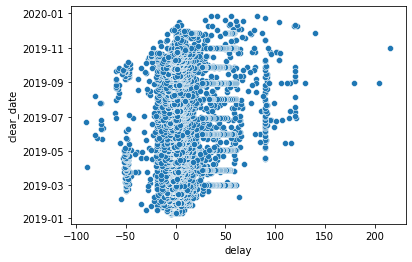

In [57]:
sns.scatterplot(data = X_train.merge(y_train,on=X_train.index), x = "delay" , y = "clear_date")

### we can see most occurind element

In [58]:
count_f  = X_train.nunique().to_frame(name = 'counts')
count_f

,counts
business_code,6
cust_number,1194
name_customer,3311
clear_date,284
buisness_year,1
doc_id,25197
posting_date,283
document_create_date,291
due_in_date,342
invoice_currency,2


In [59]:
X_train[['buisness_year']].agg(pd.Series.mode)##as counts for business year =1

,buisness_year
0,2019


### Mean and Standard Deviation  of open amount

In [60]:
X_train['total_open_amount'].agg(['mean','std']).to_frame()

,total_open_amount
mean,31545.061296
std,39114.567872


# Feature Enginering

In [61]:
from sklearn.preprocessing import LabelEncoder
business_code_encoder = LabelEncoder()
business_code_encoder.fit(X_train['business_code'])
X_train['business_code_encoder'] = business_code_encoder.transform(X_train['business_code'])

In [62]:
X_val['business_code_encoder'] = business_code_encoder.transform(X_val['business_code'])
X_test['business_code_encoder'] = business_code_encoder.transform(X_test['business_code'])

In [63]:
X_train[['business_code_encoder','business_code']]

,business_code_encoder,business_code
35753,0,CA02
12437,1,U001
29057,1,U001
5530,1,U001
21494,1,U001
...,...,...
28529,0,CA02
23737,1,U001
40645,1,U001
40510,1,U001


In [64]:
##now we have encoded value for business_code in train,test so..we can drop it from all

In [65]:
X_train.drop(['business_code'], inplace=True, axis=1)##from train
X_test.drop(['business_code'],  inplace=True, axis=1)##from test
X_val.drop(['business_code'],   inplace=True, axis=1)##from val

### changing dates columns like encoding them

In [66]:
X_train["posting_date_year"]= X_train["posting_date"].dt.year
X_val["posting_date_year"]= X_val["posting_date"].dt.year
X_test["posting_date_year"]= X_test["posting_date"].dt.year

X_train["posting_date_day"]= X_train["posting_date"].dt.day
X_val["posting_date_day"]= X_val["posting_date"].dt.day
X_test["posting_date_day"]= X_test["posting_date"].dt.day

X_train["posting_date_mon"]= X_train["posting_date"].dt.month
X_val["posting_date_mon"]= X_val["posting_date"].dt.month
X_test["posting_date_mon"]= X_test["posting_date"].dt.month

In [67]:
X_train.drop(['posting_date'], inplace=True, axis=1)##from train
X_test.drop(['posting_date'],  inplace=True, axis=1)##from test
X_val.drop(['posting_date'],   inplace=True, axis=1)##from val

In [68]:
X_train["year_due_in_date"]= X_train["due_in_date"].dt.year
X_val["year_due_in_date"]= X_val["due_in_date"].dt.year
X_test["year_due_in_date"]= X_test["due_in_date"].dt.year

X_train["month_due_in_date"]= X_train["due_in_date"].dt.month
X_val["month_due_in_date"]= X_val["due_in_date"].dt.month
X_test["month_due_in_date"]= X_test["due_in_date"].dt.month

X_train["day_due_in_date"]= X_train["due_in_date"].dt.day
X_val["day_due_in_date"]= X_val["due_in_date"].dt.day
X_test["day_due_in_date"]= X_test["due_in_date"].dt.day



In [69]:
X_train.drop(['due_in_date'], inplace=True, axis=1)##from train
X_test.drop(['due_in_date'],  inplace=True, axis=1)##from test
X_val.drop(['due_in_date'],   inplace=True, axis=1)##from val

In [70]:
X_train["year_document_create_date"]= X_train["document_create_date"].dt.year
X_val["year_document_create_date"]= X_val["document_create_date"].dt.year
X_test["year_document_create_date"]= X_test["document_create_date"].dt.year

X_train["day_document_create_date"]= X_train["document_create_date"].dt.day
X_val["day_document_create_date"]= X_val["document_create_date"].dt.day
X_test["day_document_create_date"]= X_test["document_create_date"].dt.day

X_train["month_document_create_date"]= X_train["document_create_date"].dt.month
X_val["month_document_create_date"]= X_val["document_create_date"].dt.month
X_test["month_document_create_date"]= X_test["document_create_date"].dt.month

In [71]:
X_train.drop(['document_create_date'], inplace=True, axis=1)##from train
X_test.drop(['document_create_date'],  inplace=True, axis=1)##from test
X_val.drop(['document_create_date'],   inplace=True, axis=1)##from val

In [72]:
cust_payment_terms_enc  = LabelEncoder()

cust_payment_terms_enc.fit(main_train['cust_payment_terms'])
X_train['cust_payment_terms_enc  '] = cust_payment_terms_enc.transform(X_train['cust_payment_terms'])

In [73]:
X_test['cust_payment_terms_enc  '] = cust_payment_terms_enc.transform(X_test['cust_payment_terms'])
X_val['cust_payment_terms_enc  '] = cust_payment_terms_enc.transform(X_val['cust_payment_terms'])

In [74]:
X_train.drop(['cust_payment_terms'], inplace=True, axis=1)##from train
X_test.drop(['cust_payment_terms'],  inplace=True, axis=1)##from test
X_val.drop(['cust_payment_terms'],   inplace=True, axis=1)##from val

In [75]:
cust_name_encoder = LabelEncoder()
cust_name_encoder.fit(main_train['name_customer'])
X_train['cust_name_encoder'] = cust_name_encoder.transform(X_train['name_customer'])

In [76]:
X_test['cust_name_encoder'] = cust_name_encoder.transform(X_test['name_customer'])
X_val['cust_name_encoder'] = cust_name_encoder.transform(X_val['name_customer'])

In [77]:
X_train.drop(['name_customer'], inplace=True, axis=1)##from train
X_test.drop(['name_customer'],  inplace=True, axis=1)##from test
X_val.drop(['name_customer'],   inplace=True, axis=1)##from val

In [78]:
cust_number_encoder = LabelEncoder()
cust_number_encoder.fit(main_train['cust_number'])
X_train['cust_number_encoder'] = cust_number_encoder.transform(X_train['cust_number'])

In [79]:
X_test['cust_number_encoder'] = cust_number_encoder.transform(X_test['cust_number'])
X_val['cust_number_encoder'] = cust_number_encoder.transform(X_val['cust_number'])

In [80]:
X_train.drop(['cust_number'], inplace=True, axis=1)##from train
X_test.drop(['cust_number'],  inplace=True, axis=1)##from test
X_val.drop(['cust_number'],   inplace=True, axis=1)##from val


In [81]:
X_train.drop(['clear_date'], inplace=True, axis=1)##from train
X_test.drop(['clear_date'],  inplace=True, axis=1)##from test
X_val.drop(['clear_date'],   inplace=True, axis=1)##from val

In [82]:
###now it's chance for invoice_currency
##from sklearn.preprocessing import LabelEncoder
invoice_currency_encoder = LabelEncoder()
invoice_currency_encoder.fit(X_train['invoice_currency'])
X_train['invoice_currency_encoder'] = invoice_currency_encoder.transform(X_train['invoice_currency'])

In [83]:
X_val['invoice_currency_encoder'] = invoice_currency_encoder.transform(X_val['invoice_currency'])
X_test['invoice_currency_encoder'] = invoice_currency_encoder.transform(X_test['invoice_currency'])

In [84]:
X_train[['invoice_currency_encoder','invoice_currency']]
##we have only two currency with us USD and CAD so, two values are given 0 and 1.

,invoice_currency_encoder,invoice_currency
35753,0,CAD
12437,1,USD
29057,1,USD
5530,1,USD
21494,1,USD
...,...,...
28529,0,CAD
23737,1,USD
40645,1,USD
40510,1,USD


In [85]:
##we can drop that now
X_train.drop(['invoice_currency'], inplace=True, axis=1)##from train
X_test.drop(['invoice_currency'],  inplace=True, axis=1)##from test
X_val.drop(['invoice_currency'],   inplace=True, axis=1)##from val


In [86]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27382 entries, 35753 to 32213
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   buisness_year               27382 non-null  int32  
 1   doc_id                      27382 non-null  int32  
 2   total_open_amount           27382 non-null  float64
 3   invoice_id                  27382 non-null  float64
 4   business_code_encoder       27382 non-null  int32  
 5   posting_date_year           27382 non-null  int64  
 6   posting_date_day            27382 non-null  int64  
 7   posting_date_mon            27382 non-null  int64  
 8   year_due_in_date            27382 non-null  int64  
 9   month_due_in_date           27382 non-null  int64  
 10  day_due_in_date             27382 non-null  int64  
 11  year_document_create_date   27382 non-null  int64  
 12  day_document_create_date    27382 non-null  int64  
 13  month_document_create_date 

In [87]:
##finally we encoded every column and values are in int adn float only

# Feature Selection

In [88]:
X_train.merge(y_train,on=X_train.index).corr()

,key_0,buisness_year,doc_id,total_open_amount,invoice_id,business_code_encoder,posting_date_year,posting_date_day,posting_date_mon,year_due_in_date,month_due_in_date,day_due_in_date,year_document_create_date,day_document_create_date,month_document_create_date,cust_payment_terms_enc,cust_name_encoder,cust_number_encoder,invoice_currency_encoder,delay
key_0,1.000000,NaN,-0.009301,0.003226,0.009275,-0.003881,-0.000783,-0.000489,0.012948,-0.004758,0.010991,0.013296,-0.001325,0.003628,0.012989,-0.007407,-0.007801,-0.002231,-0.009452,0.000270
buisness_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
doc_id,-0.009301,NaN,1.000000,-0.190896,-0.999330,0.521190,0.002780,-0.008384,-0.013710,-0.003065,0.001321,-0.000806,-0.006585,-0.012685,-0.013331,0.476835,0.004091,0.392246,0.999717,-0.128175
total_open_amount,0.003226,NaN,-0.190896,1.000000,0.190284,-0.114647,-0.003463,0.025963,0.008613,0.006517,-0.000580,-0.002882,0.008834,0.026578,0.006333,-0.208753,-0.007321,-0.082241,-0.190658,0.002507
invoice_id,0.009275,NaN,-0.999330,0.190284,1.000000,-0.491377,-0.002770,0.008328,0.015230,0.003153,0.001400,0.000698,0.006068,0.012710,0.014934,-0.466601,-0.005748,-0.395254,-0.999354,0.131771
business_code_encoder,-0.003881,NaN,0.521190,-0.114647,-0.491377,1.000000,-0.004098,-0.004030,-0.013487,-0.000336,0.020533,-0.002255,-0.018984,-0.004958,-0.011353,0.498956,-0.040001,0.113910,0.514160,0.019439
posting_date_year,-0.000783,NaN,0.002780,-0.003463,-0.002770,-0.004098,1.000000,-0.106946,-0.161275,0.110165,0.105355,0.005068,0.763550,-0.094286,-0.151090,0.006227,0.002579,0.014450,0.002769,-0.001104
posting_date_day,-0.000489,NaN,-0.008384,0.025963,0.008328,-0.004030,-0.106946,1.000000,-0.050234,-0.008316,0.066817,-0.367009,-0.034215,0.834437,-0.050836,-0.009695,-0.006367,-0.015505,-0.008530,-0.029680
posting_date_mon,0.012948,NaN,-0.013710,0.008613,0.015230,-0.013487,-0.161275,-0.050234,1.000000,-0.013625,0.938432,0.029396,-0.074187,-0.035413,0.975891,0.003806,-0.016628,-0.024436,-0.014105,-0.018420
year_due_in_date,-0.004758,NaN,-0.003065,0.006517,0.003153,-0.000336,0.110165,-0.008316,-0.013625,1.000000,-0.024455,-0.007671,0.087239,-0.009221,-0.013562,-0.022652,0.000445,-0.015530,-0.003084,-0.055680


<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

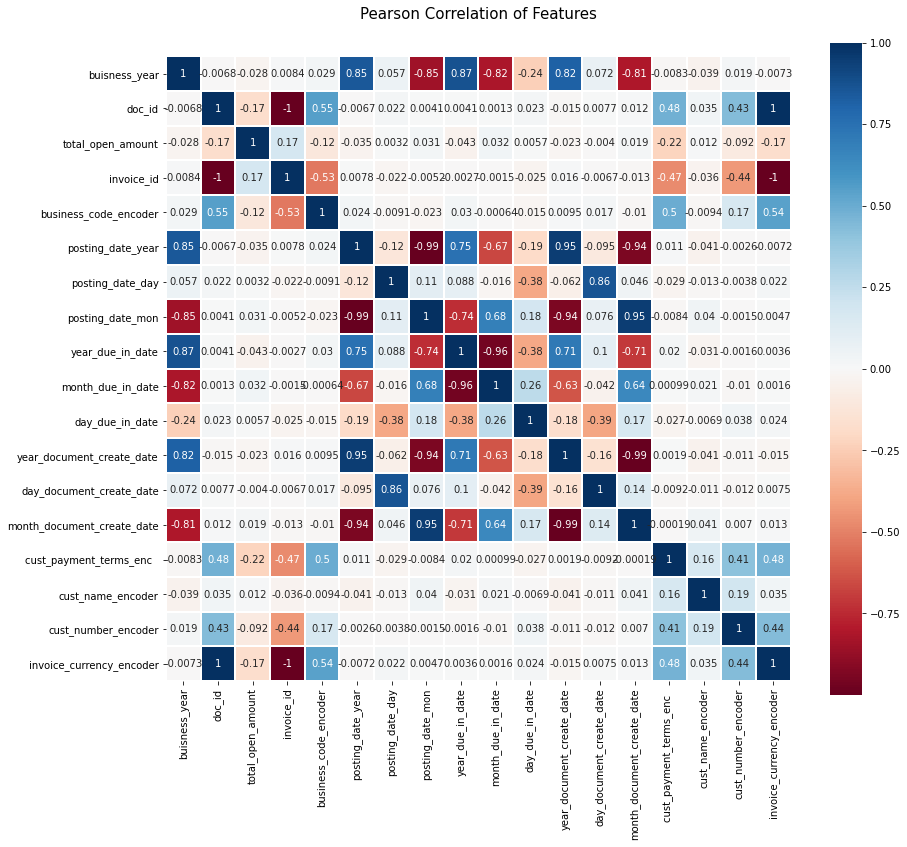

In [89]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(X_test.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [90]:
from sklearn.feature_selection import VarianceThreshold
aa = VarianceThreshold(0.8)

In [91]:
aa.fit(X_test)

VarianceThreshold(threshold=0.8)

In [92]:
aa.variances_

array([9.92951500e-02, 1.11533892e+18, 1.47487806e+09, 7.10627393e+16,
       2.45427001e-01, 1.26040326e-01, 6.66246241e+01, 1.41668450e+01,
       8.03424893e-02, 8.65672479e+00, 8.25483375e+01, 1.33717605e-01,
       6.79130072e+01, 1.50117610e+01, 1.21137396e+02, 1.70783133e+06,
       5.06770912e+04, 6.71810913e-02])

# Modelling

## linear regression model

In [93]:
##we can define list to store the results and name of algo
algo=[]
mse_score=[]
r2_scr=[]

In [94]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [95]:
from sklearn.linear_model import LinearRegression
babba_model = LinearRegression()
babba_model.fit(X_train,y_train)
##here we r making a base model

LinearRegression()

In [96]:
Y_predicted = babba_model.predict(X_val)

In [97]:
print('rms value:{}'.format(mean_squared_error(y_val,Y_predicted,squared=False)))
print('r2_score:{}'.format(abs(r2_score(y_val,Y_predicted))))

rms value:6.753813907136975
r2_score:0.06401773314743597


In [98]:
mean_squared_error(y_val,Y_predicted )

45.61400229223681

In [99]:
pd.DataFrame(zip(y_val,Y_predicted),columns=["delay","clear_date_prediction"])

,delay,clear_date_prediction
0,-2.0,5.833478
1,-8.0,1.030108
2,0.0,-0.014535
3,-8.0,-1.754395
4,6.0,-1.142933
...,...,...
5863,-1.0,-0.196434
5864,-21.0,-51.018635
5865,0.0,-3.013454
5866,5.0,0.063136


In [100]:
algo.append("linear regression")
mse_score.append(mean_squared_error(y_val,Y_predicted ))
r2_scr.append(abs(r2_score(y_val,Y_predicted)))

## Decision Tree model

In [101]:
from sklearn.tree import DecisionTreeRegressor  
t_model = DecisionTreeRegressor(random_state=0,max_depth=5)
t_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

In [102]:
##predicting the test set result
first_pred = t_model.predict(X_val)

In [103]:
mean_squared_error(y_val,first_pred,squared=False)

5.7878478211561335

In [104]:
y_predict_test = t_model.predict(X_test)
mean_squared_error(y_test, y_predict_test, squared=False)

7.437464492570612

In [105]:
algo.append("decision tree")

In [106]:
mse_score.append(mean_squared_error(y_val,first_pred ))

In [107]:
r2_scr.append(abs(r2_score(y_val,first_pred)))

In [108]:
comparison = pd.DataFrame(list(zip(algo, mse_score, r2_scr)), columns = ['Algorithm', 'MSE_Score', 'R2_Score'])

In [109]:
comparison

,Algorithm,MSE_Score,R2_Score
0,linear regression,45.614002,0.064018
1,decision tree,33.499182,0.312609


### working on lost data

In [110]:
main_test.isna().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             10000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    0
isOpen                        0
delay                     10000
dtype: int64

In [111]:
##now we will do some feature engineering on test set also

In [112]:
##and firstly we have to remove delay and clear from it bcs we have to predict them and we do not drop them now than it will be a leakage 
## type problem like we already giving all info to test so no use of prediction than....

In [113]:
X_m_test= main_test.drop(["delay","clear_date"],axis =1)


In [114]:
X_m_test

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
7,U001,0200769623,WAL-MAR us,2020.0,1.930582e+09,2020-02-28,20200228,20200228,2020-03-14,USD,RV,1.0,NaN,18530.91,20200228.0,NAH4,1.930582e+09,1
8,U001,0200794332,COST,2020.0,1.930652e+09,2020-03-14,20200314,20200314,2020-03-29,USD,RV,1.0,NaN,13765.60,20200314.0,NAAX,1.930652e+09,1
11,U001,0200772670,ASSOCIAT foundation,2020.0,1.930753e+09,2020-04-06,20200406,20200406,2020-04-21,USD,RV,1.0,NaN,43304.62,20200406.0,NAU5,1.930753e+09,1
12,U001,0200803720,DEC trust,2020.0,1.930618e+09,2020-03-07,20200307,20200307,2020-03-24,USD,RV,1.0,NaN,318.34,20200301.0,NAM4,1.930618e+09,1
22,U001,0200793830,M corp,2020.0,1.930710e+09,2020-03-28,20200327,20200328,2020-04-12,USD,RV,1.0,NaN,48300.66,20200328.0,NAA8,1.930710e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49977,U001,0200769623,WAL-MAR systems,2020.0,1.930748e+09,2020-04-05,20200404,20200405,2020-04-20,USD,RV,1.0,NaN,426.66,20200405.0,NAH4,1.930748e+09,1
49980,U001,0200769623,WAL-MAR systems,2020.0,1.930847e+09,2020-05-01,20200501,20200501,2020-05-16,USD,RV,1.0,NaN,471.56,20200501.0,NAH4,1.930847e+09,1
49983,U001,0200769623,WAL-MAR foundation,2020.0,1.930813e+09,2020-04-24,20200422,20200424,2020-05-09,USD,RV,1.0,NaN,42109.95,20200424.0,NAH4,1.930813e+09,1
49991,U001,200793568,SUPE trust,2020.0,1.930691e+09,2020-03-23,20200324,20200323,2020-04-07,USD,RV,1.0,NaN,1635.76,20200323.0,NAA8,1.930691e+09,1


In [115]:
# Also removing both from main_test
main_test.drop(["delay","clear_date"],inplace=True,axis=1)

In [116]:
X_m_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 7 to 49996
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           10000 non-null  object        
 1   cust_number             10000 non-null  object        
 2   name_customer           10000 non-null  object        
 3   buisness_year           10000 non-null  float64       
 4   doc_id                  10000 non-null  float64       
 5   posting_date            10000 non-null  object        
 6   document_create_date    10000 non-null  int64         
 7   document_create_date.1  10000 non-null  int64         
 8   due_in_date             10000 non-null  datetime64[ns]
 9   invoice_currency        10000 non-null  object        
 10  document type           10000 non-null  object        
 11  posting_id              10000 non-null  float64       
 12  area_business           0 non-null      float6

In [117]:
#Changing the dtype of the following
X_m_test["doc_id"]=X_m_test.doc_id.astype(int)
X_m_test["buisness_year"]=X_m_test.buisness_year.astype(int)

In [118]:
X_m_test["posting_date"]= pd.to_datetime(X_m_test["posting_date"])
X_m_test["document_create_date"]= pd.to_datetime(X_m_test.document_create_date,format='%Y%m%d')
X_m_test["baseline_create_date"]= pd.to_datetime(X_m_test.baseline_create_date,format='%Y%m%d')
#### Converting into datetime format


In [119]:
X_m_test.drop("document_create_date.1",axis=1,inplace=True)
X_m_test.drop("area_business",axis=1,inplace=True)

In [120]:
X_m_test.business_code.value_counts()##we will not do any clubbing here

U001    9186
CA02     731
U013      58
U002      22
U005       3
Name: business_code, dtype: int64

In [121]:
X_m_test.sort_values(by=["posting_date"],inplace=True)

In [122]:
X_m_test.drop("posting_id",axis=1,inplace=True)
X_m_test.drop("isOpen",axis=1,inplace=True)

In [123]:

X_m_test.drop("baseline_create_date",axis=1,inplace=True)



In [124]:
X_m_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 23598 to 40307
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         10000 non-null  object        
 1   cust_number           10000 non-null  object        
 2   name_customer         10000 non-null  object        
 3   buisness_year         10000 non-null  int32         
 4   doc_id                10000 non-null  int32         
 5   posting_date          10000 non-null  datetime64[ns]
 6   document_create_date  10000 non-null  datetime64[ns]
 7   due_in_date           10000 non-null  datetime64[ns]
 8   invoice_currency      10000 non-null  object        
 9   document type         10000 non-null  object        
 10  total_open_amount     10000 non-null  float64       
 11  cust_payment_terms    10000 non-null  object        
 12  invoice_id            10000 non-null  float64       
dtypes: datetime6

In [125]:
cust_name_encoder = LabelEncoder()
cust_name_encoder.fit(X_m_test['name_customer'])
X_m_test['cust_name_encoder'] = cust_name_encoder.transform(X_m_test['name_customer'])

In [126]:
X_m_test.drop(['name_customer'], inplace=True, axis=1)##from test

In [127]:
cust_number_encoder = LabelEncoder()
cust_number_encoder.fit(X_m_test['cust_number'])
X_m_test['cust_number_encoder'] = cust_number_encoder.transform(X_m_test['cust_number'])

In [128]:
X_m_test.drop(['cust_number'], inplace=True, axis=1)##from test

In [129]:
X_m_test.drop(['document type'],inplace=True,axis=1)

In [130]:
X_m_test["year_posting_date"]= X_m_test["posting_date"].dt.year
X_m_test["day_posting_date"]= X_m_test["posting_date"].dt.day
X_m_test["month_posting_date"]= X_m_test["posting_date"].dt.month

X_m_test["year_due_in_date"]= X_m_test["due_in_date"].dt.year
X_m_test["day_due_in_date"]= X_m_test["due_in_date"].dt.day
X_m_test["month_due_in_date"]= X_m_test["due_in_date"].dt.month

X_m_test["year_document_create_date"]= X_m_test["document_create_date"].dt.year
X_m_test["day_document_create_date"]= X_m_test["document_create_date"].dt.day
X_m_test["month_document_create_date"]= X_m_test["document_create_date"].dt.month

In [131]:
X_m_test.drop(['posting_date'],inplace=True,axis=1)

In [132]:
X_m_test.drop(['due_in_date'],inplace=True,axis=1)

In [133]:
X_m_test.drop(['document_create_date'],inplace=True,axis=1)

In [134]:
cust_payment_terms_enc  = LabelEncoder()

cust_payment_terms_enc.fit(X_m_test['cust_payment_terms'])
X_m_test['cust_payment_terms_enc  '] = cust_payment_terms_enc.transform(X_m_test['cust_payment_terms'])

In [135]:
X_m_test.drop(['cust_payment_terms'],inplace=True,axis=1)

In [136]:
business_code_enc = LabelEncoder()
business_code_enc.fit(X_m_test["business_code"])
X_m_test["business_code_enc"]=business_code_enc.transform(X_m_test["business_code"])

In [137]:
X_m_test.drop(['business_code'],inplace=True,axis=1)

In [138]:
invoice_currency_encoder = LabelEncoder()
invoice_currency_encoder.fit(X_m_test['invoice_currency'])
X_m_test['invoice_currency_encoder'] = invoice_currency_encoder.transform(X_m_test['invoice_currency'])

In [139]:
X_m_test.drop(['invoice_currency'],inplace=True,axis=1)

In [140]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27382 entries, 35753 to 32213
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   buisness_year               27382 non-null  int32  
 1   doc_id                      27382 non-null  int32  
 2   total_open_amount           27382 non-null  float64
 3   invoice_id                  27382 non-null  float64
 4   business_code_encoder       27382 non-null  int32  
 5   posting_date_year           27382 non-null  int64  
 6   posting_date_day            27382 non-null  int64  
 7   posting_date_mon            27382 non-null  int64  
 8   year_due_in_date            27382 non-null  int64  
 9   month_due_in_date           27382 non-null  int64  
 10  day_due_in_date             27382 non-null  int64  
 11  year_document_create_date   27382 non-null  int64  
 12  day_document_create_date    27382 non-null  int64  
 13  month_document_create_date 

In [141]:
X_m_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 23598 to 40307
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   buisness_year               10000 non-null  int32  
 1   doc_id                      10000 non-null  int32  
 2   total_open_amount           10000 non-null  float64
 3   invoice_id                  10000 non-null  float64
 4   cust_name_encoder           10000 non-null  int32  
 5   cust_number_encoder         10000 non-null  int32  
 6   year_posting_date           10000 non-null  int64  
 7   day_posting_date            10000 non-null  int64  
 8   month_posting_date          10000 non-null  int64  
 9   year_due_in_date            10000 non-null  int64  
 10  day_due_in_date             10000 non-null  int64  
 11  month_due_in_date           10000 non-null  int64  
 12  year_document_create_date   10000 non-null  int64  
 13  day_document_create_date   

In [142]:
##we have now equal number of attributes with us we can proceed now

In [143]:
final_result = t_model.predict(X_m_test)

In [144]:
final_result = pd.Series(final_result,name='Prediction_delay')

In [145]:
##we can merge our newly created index on test
Final = main_test.merge(final_result , on = X_m_test.index )

In [146]:
Final['Prediction_delay']=Final.Prediction_delay.astype(int)

In [147]:
Final

,key_0,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Prediction_delay
0,23598,U001,0200769623,WAL-MAR us,2020.0,1.930582e+09,2020-02-28,20200228,20200228,2020-03-14,USD,RV,1.0,NaN,18530.91,20200228.0,NAH4,1.930582e+09,1,3
1,24439,U001,0200794332,COST,2020.0,1.930652e+09,2020-03-14,20200314,20200314,2020-03-29,USD,RV,1.0,NaN,13765.60,20200314.0,NAAX,1.930652e+09,1,0
2,12417,U001,0200772670,ASSOCIAT foundation,2020.0,1.930753e+09,2020-04-06,20200406,20200406,2020-04-21,USD,RV,1.0,NaN,43304.62,20200406.0,NAU5,1.930753e+09,1,0
3,12428,U001,0200803720,DEC trust,2020.0,1.930618e+09,2020-03-07,20200307,20200307,2020-03-24,USD,RV,1.0,NaN,318.34,20200301.0,NAM4,1.930618e+09,1,0
4,45003,U001,0200793830,M corp,2020.0,1.930710e+09,2020-03-28,20200327,20200328,2020-04-12,USD,RV,1.0,NaN,48300.66,20200328.0,NAA8,1.930710e+09,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,40283,U001,0200769623,WAL-MAR systems,2020.0,1.930748e+09,2020-04-05,20200404,20200405,2020-04-20,USD,RV,1.0,NaN,426.66,20200405.0,NAH4,1.930748e+09,1,0
9996,18869,U001,0200769623,WAL-MAR systems,2020.0,1.930847e+09,2020-05-01,20200501,20200501,2020-05-16,USD,RV,1.0,NaN,471.56,20200501.0,NAH4,1.930847e+09,1,0
9997,15937,U001,0200769623,WAL-MAR foundation,2020.0,1.930813e+09,2020-04-24,20200422,20200424,2020-05-09,USD,RV,1.0,NaN,42109.95,20200424.0,NAH4,1.930813e+09,1,0
9998,13574,U001,200793568,SUPE trust,2020.0,1.930691e+09,2020-03-23,20200324,20200323,2020-04-07,USD,RV,1.0,NaN,1635.76,20200323.0,NAA8,1.930691e+09,1,3


In [148]:
from datetime import timedelta
Final['predicted_clear_date']= Final['due_in_date'] + pd.to_timedelta(Final['Prediction_delay'],'d')

In [149]:
Final

,key_0,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Prediction_delay,predicted_clear_date
0,23598,U001,0200769623,WAL-MAR us,2020.0,1.930582e+09,2020-02-28,20200228,20200228,2020-03-14,...,RV,1.0,NaN,18530.91,20200228.0,NAH4,1.930582e+09,1,3,2020-03-17
1,24439,U001,0200794332,COST,2020.0,1.930652e+09,2020-03-14,20200314,20200314,2020-03-29,...,RV,1.0,NaN,13765.60,20200314.0,NAAX,1.930652e+09,1,0,2020-03-29
2,12417,U001,0200772670,ASSOCIAT foundation,2020.0,1.930753e+09,2020-04-06,20200406,20200406,2020-04-21,...,RV,1.0,NaN,43304.62,20200406.0,NAU5,1.930753e+09,1,0,2020-04-21
3,12428,U001,0200803720,DEC trust,2020.0,1.930618e+09,2020-03-07,20200307,20200307,2020-03-24,...,RV,1.0,NaN,318.34,20200301.0,NAM4,1.930618e+09,1,0,2020-03-24
4,45003,U001,0200793830,M corp,2020.0,1.930710e+09,2020-03-28,20200327,20200328,2020-04-12,...,RV,1.0,NaN,48300.66,20200328.0,NAA8,1.930710e+09,1,0,2020-04-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,40283,U001,0200769623,WAL-MAR systems,2020.0,1.930748e+09,2020-04-05,20200404,20200405,2020-04-20,...,RV,1.0,NaN,426.66,20200405.0,NAH4,1.930748e+09,1,0,2020-04-20
9996,18869,U001,0200769623,WAL-MAR systems,2020.0,1.930847e+09,2020-05-01,20200501,20200501,2020-05-16,...,RV,1.0,NaN,471.56,20200501.0,NAH4,1.930847e+09,1,0,2020-05-16
9997,15937,U001,0200769623,WAL-MAR foundation,2020.0,1.930813e+09,2020-04-24,20200422,20200424,2020-05-09,...,RV,1.0,NaN,42109.95,20200424.0,NAH4,1.930813e+09,1,0,2020-05-09
9998,13574,U001,200793568,SUPE trust,2020.0,1.930691e+09,2020-03-23,20200324,20200323,2020-04-07,...,RV,1.0,NaN,1635.76,20200323.0,NAA8,1.930691e+09,1,3,2020-04-10


## BUCKET AGEING

In [150]:
## this is the last part we have to add in our dataframe

In [151]:
def bucketization(x):
    if x<0:
        return('(< 0) Days')
    if x in range(0,16):
        return('(0-15) Days')
    elif x in range(16,31):
        return('(16-30) Days')
    elif x in range(31,45):
        return('(31-45) Days')
    elif x in range(45,60):
        return('(45-60) Days')
    else:
        return('(> 60) Days')

In [152]:
gc.collect()

Final = Final.reset_index(drop=True)
Final['bucket_predicted']= pd.Series([bucketization(x=Final['Prediction_delay'][i])  for i in range(len(Final))])
bucket_mapper = {'(< 0) Days':0,'(0-15) Days':1,'(16-30) Days':2,'(31-45) Days':4,'(45-60) Days':5,'(> 60) Days':6}
Final['delay_bucket_id'] = Final['bucket_predicted'].map(bucket_mapper)
Final.columns


Index(['key_0', 'business_code', 'cust_number', 'name_customer',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen',
       'Prediction_delay', 'predicted_clear_date', 'bucket_predicted',
       'delay_bucket_id'],
      dtype='object')

In [153]:
Final

,key_0,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Prediction_delay,predicted_clear_date,bucket_predicted,delay_bucket_id
0,23598,U001,0200769623,WAL-MAR us,2020.0,1.930582e+09,2020-02-28,20200228,20200228,2020-03-14,...,NaN,18530.91,20200228.0,NAH4,1.930582e+09,1,3,2020-03-17,(0-15) Days,1
1,24439,U001,0200794332,COST,2020.0,1.930652e+09,2020-03-14,20200314,20200314,2020-03-29,...,NaN,13765.60,20200314.0,NAAX,1.930652e+09,1,0,2020-03-29,(0-15) Days,1
2,12417,U001,0200772670,ASSOCIAT foundation,2020.0,1.930753e+09,2020-04-06,20200406,20200406,2020-04-21,...,NaN,43304.62,20200406.0,NAU5,1.930753e+09,1,0,2020-04-21,(0-15) Days,1
3,12428,U001,0200803720,DEC trust,2020.0,1.930618e+09,2020-03-07,20200307,20200307,2020-03-24,...,NaN,318.34,20200301.0,NAM4,1.930618e+09,1,0,2020-03-24,(0-15) Days,1
4,45003,U001,0200793830,M corp,2020.0,1.930710e+09,2020-03-28,20200327,20200328,2020-04-12,...,NaN,48300.66,20200328.0,NAA8,1.930710e+09,1,0,2020-04-12,(0-15) Days,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,40283,U001,0200769623,WAL-MAR systems,2020.0,1.930748e+09,2020-04-05,20200404,20200405,2020-04-20,...,NaN,426.66,20200405.0,NAH4,1.930748e+09,1,0,2020-04-20,(0-15) Days,1
9996,18869,U001,0200769623,WAL-MAR systems,2020.0,1.930847e+09,2020-05-01,20200501,20200501,2020-05-16,...,NaN,471.56,20200501.0,NAH4,1.930847e+09,1,0,2020-05-16,(0-15) Days,1
9997,15937,U001,0200769623,WAL-MAR foundation,2020.0,1.930813e+09,2020-04-24,20200422,20200424,2020-05-09,...,NaN,42109.95,20200424.0,NAH4,1.930813e+09,1,0,2020-05-09,(0-15) Days,1
9998,13574,U001,200793568,SUPE trust,2020.0,1.930691e+09,2020-03-23,20200324,20200323,2020-04-07,...,NaN,1635.76,20200323.0,NAA8,1.930691e+09,1,3,2020-04-10,(0-15) Days,1


In [156]:
Final.drop(['area_business'],inplace =True,axis=1)

In [162]:
##we don't have any duplicates,null values
##we ready to take this file now

In [164]:
Final

,key_0,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Prediction_delay,predicted_clear_date,bucket_predicted,delay_bucket_id
0,23598,U001,0200769623,WAL-MAR us,2020.0,1.930582e+09,2020-02-28,20200228,20200228,2020-03-14,...,1.0,18530.91,20200228.0,NAH4,1.930582e+09,1,3,2020-03-17,(0-15) Days,1
1,24439,U001,0200794332,COST,2020.0,1.930652e+09,2020-03-14,20200314,20200314,2020-03-29,...,1.0,13765.60,20200314.0,NAAX,1.930652e+09,1,0,2020-03-29,(0-15) Days,1
2,12417,U001,0200772670,ASSOCIAT foundation,2020.0,1.930753e+09,2020-04-06,20200406,20200406,2020-04-21,...,1.0,43304.62,20200406.0,NAU5,1.930753e+09,1,0,2020-04-21,(0-15) Days,1
3,12428,U001,0200803720,DEC trust,2020.0,1.930618e+09,2020-03-07,20200307,20200307,2020-03-24,...,1.0,318.34,20200301.0,NAM4,1.930618e+09,1,0,2020-03-24,(0-15) Days,1
4,45003,U001,0200793830,M corp,2020.0,1.930710e+09,2020-03-28,20200327,20200328,2020-04-12,...,1.0,48300.66,20200328.0,NAA8,1.930710e+09,1,0,2020-04-12,(0-15) Days,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,40283,U001,0200769623,WAL-MAR systems,2020.0,1.930748e+09,2020-04-05,20200404,20200405,2020-04-20,...,1.0,426.66,20200405.0,NAH4,1.930748e+09,1,0,2020-04-20,(0-15) Days,1
9996,18869,U001,0200769623,WAL-MAR systems,2020.0,1.930847e+09,2020-05-01,20200501,20200501,2020-05-16,...,1.0,471.56,20200501.0,NAH4,1.930847e+09,1,0,2020-05-16,(0-15) Days,1
9997,15937,U001,0200769623,WAL-MAR foundation,2020.0,1.930813e+09,2020-04-24,20200422,20200424,2020-05-09,...,1.0,42109.95,20200424.0,NAH4,1.930813e+09,1,0,2020-05-09,(0-15) Days,1
9998,13574,U001,200793568,SUPE trust,2020.0,1.930691e+09,2020-03-23,20200324,20200323,2020-04-07,...,1.0,1635.76,20200323.0,NAA8,1.930691e+09,1,3,2020-04-10,(0-15) Days,1


In [165]:
Final['document_create_date.1'] = pd.to_datetime(Final['document_create_date.1'],format = '%Y%m%d')

In [166]:
Final['document_create_date'] = pd.to_datetime(Final['document_create_date'],format = '%Y%m%d')

In [171]:
Final['baseline_create_date'] = pd.to_datetime(Final['baseline_create_date'],format = '%Y%m%d')

In [172]:
Final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   key_0                  10000 non-null  int64         
 1   business_code          10000 non-null  object        
 2   cust_number            10000 non-null  object        
 3   name_customer          10000 non-null  object        
 4   buisness_year          10000 non-null  float64       
 5   doc_id                 10000 non-null  float64       
 6   posting_date           10000 non-null  object        
 7   document_create_date   10000 non-null  datetime64[ns]
 8   document_create_date1  10000 non-null  datetime64[ns]
 9   due_in_date            10000 non-null  datetime64[ns]
 10  invoice_currency       10000 non-null  object        
 11  document type          10000 non-null  object        
 12  posting_id             10000 non-null  float64       
 13  to

In [173]:
Final.rename(columns={"document_create_date.1":"document_create_date1"}, inplace=True)

In [174]:
Final

,key_0,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,document_create_date1,due_in_date,...,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Prediction_delay,predicted_clear_date,bucket_predicted,delay_bucket_id
0,23598,U001,0200769623,WAL-MAR us,2020.0,1.930582e+09,2020-02-28,2020-02-28,2020-02-28,2020-03-14,...,1.0,18530.91,2020-02-28,NAH4,1.930582e+09,1,3,2020-03-17,(0-15) Days,1
1,24439,U001,0200794332,COST,2020.0,1.930652e+09,2020-03-14,2020-03-14,2020-03-14,2020-03-29,...,1.0,13765.60,2020-03-14,NAAX,1.930652e+09,1,0,2020-03-29,(0-15) Days,1
2,12417,U001,0200772670,ASSOCIAT foundation,2020.0,1.930753e+09,2020-04-06,2020-04-06,2020-04-06,2020-04-21,...,1.0,43304.62,2020-04-06,NAU5,1.930753e+09,1,0,2020-04-21,(0-15) Days,1
3,12428,U001,0200803720,DEC trust,2020.0,1.930618e+09,2020-03-07,2020-03-07,2020-03-07,2020-03-24,...,1.0,318.34,2020-03-01,NAM4,1.930618e+09,1,0,2020-03-24,(0-15) Days,1
4,45003,U001,0200793830,M corp,2020.0,1.930710e+09,2020-03-28,2020-03-27,2020-03-28,2020-04-12,...,1.0,48300.66,2020-03-28,NAA8,1.930710e+09,1,0,2020-04-12,(0-15) Days,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,40283,U001,0200769623,WAL-MAR systems,2020.0,1.930748e+09,2020-04-05,2020-04-04,2020-04-05,2020-04-20,...,1.0,426.66,2020-04-05,NAH4,1.930748e+09,1,0,2020-04-20,(0-15) Days,1
9996,18869,U001,0200769623,WAL-MAR systems,2020.0,1.930847e+09,2020-05-01,2020-05-01,2020-05-01,2020-05-16,...,1.0,471.56,2020-05-01,NAH4,1.930847e+09,1,0,2020-05-16,(0-15) Days,1
9997,15937,U001,0200769623,WAL-MAR foundation,2020.0,1.930813e+09,2020-04-24,2020-04-22,2020-04-24,2020-05-09,...,1.0,42109.95,2020-04-24,NAH4,1.930813e+09,1,0,2020-05-09,(0-15) Days,1
9998,13574,U001,200793568,SUPE trust,2020.0,1.930691e+09,2020-03-23,2020-03-24,2020-03-23,2020-04-07,...,1.0,1635.76,2020-03-23,NAA8,1.930691e+09,1,3,2020-04-10,(0-15) Days,1


In [177]:
Final.to_csv('Final_high', sep='\t')